In [0]:
display(dbutils.fs.ls("/databricks-datasets"))

path,name,size,modificationTime
dbfs:/databricks-datasets/COVID/,COVID/,0,1753540426148
dbfs:/databricks-datasets/README.md,README.md,976,1532502319000
dbfs:/databricks-datasets/Rdatasets/,Rdatasets/,0,1753540426148
dbfs:/databricks-datasets/SPARK_README.md,SPARK_README.md,3359,1455505218000
dbfs:/databricks-datasets/adult/,adult/,0,1753540426148
dbfs:/databricks-datasets/airlines/,airlines/,0,1753540426148
dbfs:/databricks-datasets/amazon/,amazon/,0,1753540426148
dbfs:/databricks-datasets/asa/,asa/,0,1753540426148
dbfs:/databricks-datasets/atlas_higgs/,atlas_higgs/,0,1753540426148
dbfs:/databricks-datasets/bikeSharing/,bikeSharing/,0,1753540426148


In [0]:

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, to_timestamp, concat_ws
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Load the dataset from DBFS. Set inferSchema=True to automatically detect column types.
df = (spark.read
      .format('csv')
      .option('header', 'true')
      .option('inferSchema', 'true')
      .load('/databricks-datasets/bikeSharing/data-001/hour.csv'))

In [0]:
# Persist DataFrame in memory for better performance during EDA
_ = df.cache()

df.printSchema()
print(f"Total rows: {df.count()}")

# Display a sample of the data
print(df.show(5))

root
 |-- instant: integer (nullable = true)
 |-- dteday: date (nullable = true)
 |-- season: integer (nullable = true)
 |-- yr: integer (nullable = true)
 |-- mnth: integer (nullable = true)
 |-- hr: integer (nullable = true)
 |-- holiday: integer (nullable = true)
 |-- weekday: integer (nullable = true)
 |-- workingday: integer (nullable = true)
 |-- weathersit: integer (nullable = true)
 |-- temp: double (nullable = true)
 |-- atemp: double (nullable = true)
 |-- hum: double (nullable = true)
 |-- windspeed: double (nullable = true)
 |-- casual: integer (nullable = true)
 |-- registered: integer (nullable = true)
 |-- cnt: integer (nullable = true)

Total rows: 17379
+-------+----------+------+---+----+---+-------+-------+----------+----------+----+------+----+---------+------+----------+---+
|instant|    dteday|season| yr|mnth| hr|holiday|weekday|workingday|weathersit|temp| atemp| hum|windspeed|casual|registered|cnt|
+-------+----------+------+---+----+---+-------+-------+---------

In [0]:

# Summary statistics for numerical columns
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
df.select(numeric_cols).describe().show()

# Count distinct values for categorical columns
categorical_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for c in categorical_cols:
    unique_count = df.select(c).distinct().count()
    print(f"Column {c} has {unique_count} unique values")

+-------+-------------------+------------------+-------------------+-------------------+-----------------+------------------+------------------+
|summary|               temp|             atemp|                hum|          windspeed|           casual|        registered|               cnt|
+-------+-------------------+------------------+-------------------+-------------------+-----------------+------------------+------------------+
|  count|              17379|             17379|              17379|              17379|            17379|             17379|             17379|
|   mean| 0.4969871684216586|0.4757751021347581| 0.6272288394038822| 0.1900976063064631|35.67621842453536|153.78686920996606|189.46308763450142|
| stddev|0.19255612124972202|0.1718502156353594|0.19292983406291458|0.12234022857279034|49.30503038705298|151.35728591258325| 181.3875990918646|
|    min|               0.02|               0.0|                0.0|                0.0|                0|                 0|     

In [0]:

# Convert to pandas for plotting
pdf = df.toPandas()

# Convert date and time fields
temp_datetime = pd.to_datetime(pdf['dteday'])
# Combine date (dteday) and hour (hr) into a full timestamp for hourly analysis
pdf['datetime'] = pd.to_datetime(pdf['dteday']) + pd.to_timedelta(pdf['hr'], unit='h')

# Map categorical codes to descriptive labels for better readability
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
weathersit_map = {1:'Clear', 2:'Mist/Cloudy', 3:'Light Snow/Rain', 4:'Heavy Rain/Snow'}

pdf['season_label'] = pdf['season'].map(season_map)
pdf['weathersit_label'] = pdf['weathersit'].map(weathersit_map)

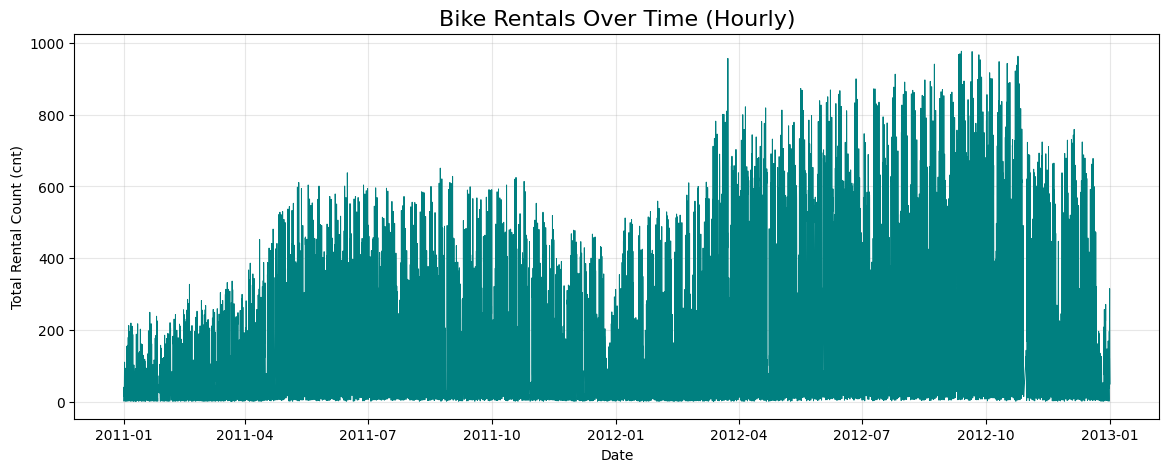

In [0]:
plt.figure(figsize=(14,5))
plt.plot(pdf['datetime'], pdf['cnt'], color='teal', linewidth=0.7)
plt.title('Bike Rentals Over Time (Hourly)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Rental Count (cnt)')
plt.grid(alpha=0.3)
plt.show()

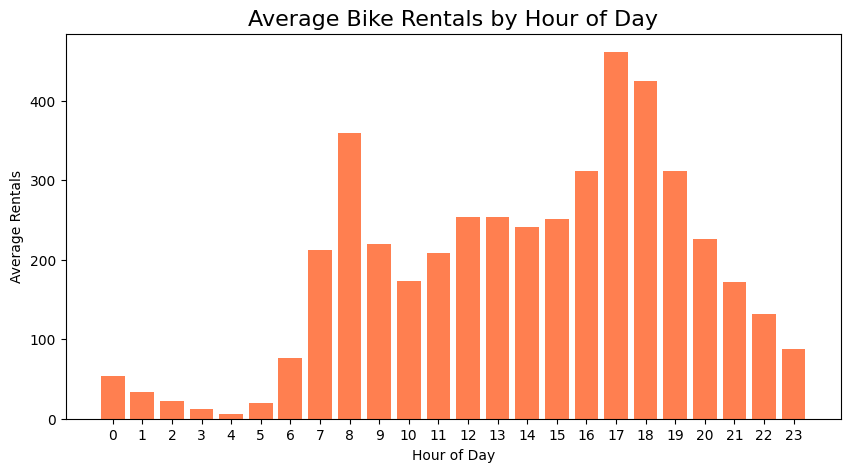

In [0]:
hourly_avg = pdf.groupby('hr')['cnt'].mean()

plt.figure(figsize=(10,5))
plt.bar(hourly_avg.index, hourly_avg.values, color='coral')
plt.title('Average Bike Rentals by Hour of Day', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.xticks(range(0,24))
plt.show()

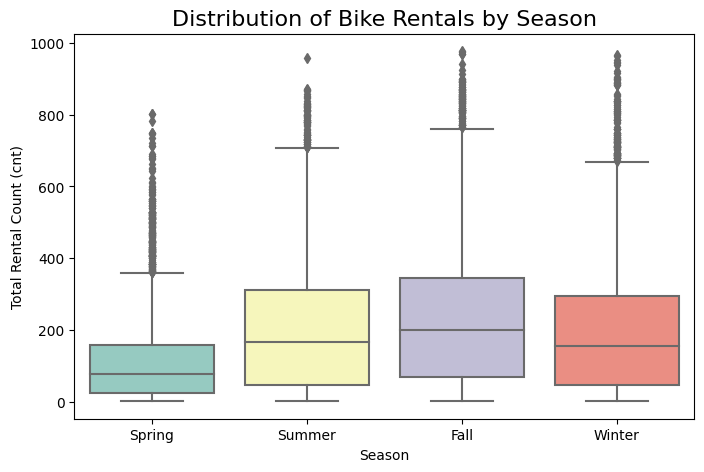

In [0]:

plt.figure(figsize=(8,5))
sns.boxplot(x='season_label', y='cnt', data=pdf, palette='Set3')
plt.title('Distribution of Bike Rentals by Season', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Total Rental Count (cnt)')
plt.show()

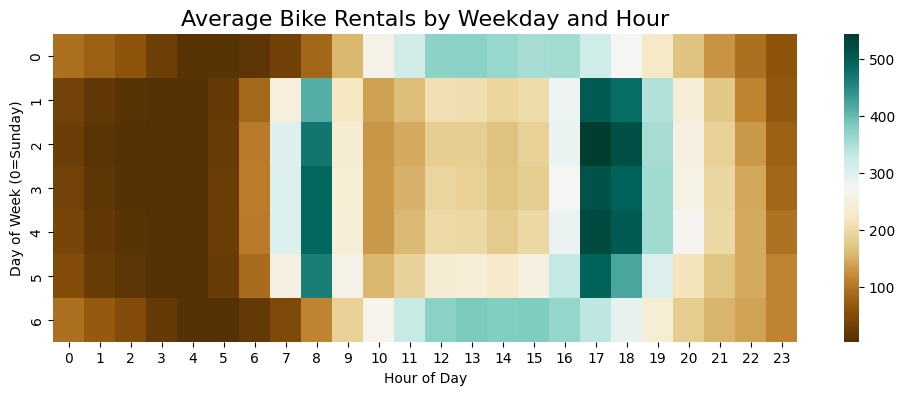

In [0]:

# Create pivot table: rows = weekday, columns = hour, values = average count
heat_data = pdf.pivot_table(index='weekday', columns='hr', values='cnt', aggfunc='mean')

plt.figure(figsize=(12,4))
sns.heatmap(heat_data, cmap='BrBG')
plt.title('Average Bike Rentals by Weekday and Hour', fontsize=16)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0=Sunday)')
plt.show()

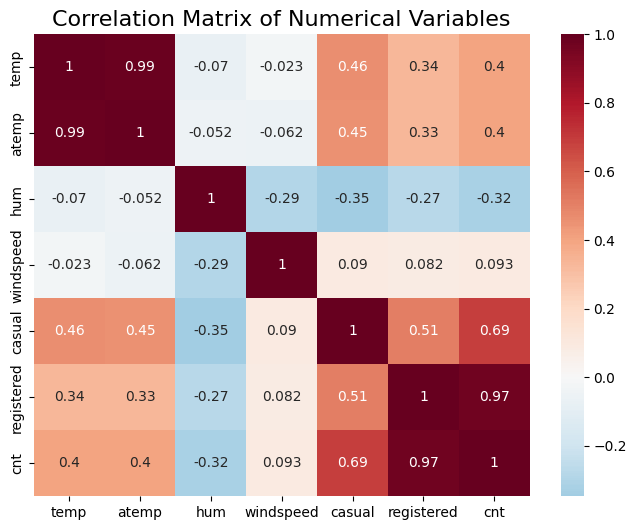

In [0]:

plt.figure(figsize=(8,6))
corr = pdf[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()
sns.heatmap(corr, annot=True, cmap='RdBu_r', center=0)
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.show()

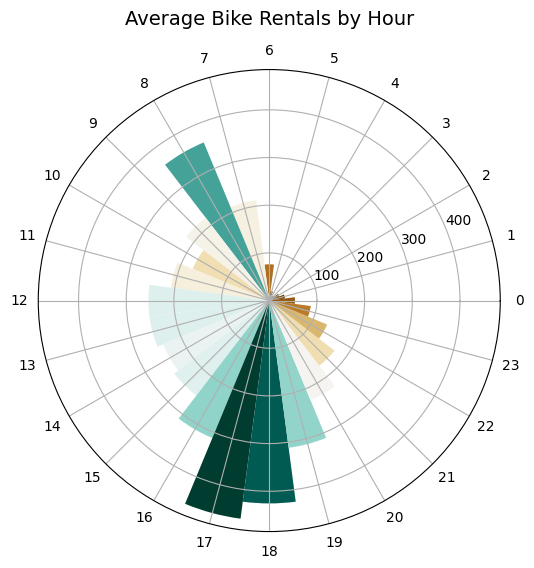

In [0]:

import numpy as np

# Compute mean rentals by hour for polar plot
hourly_counts = pdf.groupby('hr')['cnt'].mean()
theta = np.linspace(0.0, 2 * np.pi, len(hourly_counts), endpoint=False)
radii = hourly_counts.values

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
ax.bar(theta, radii, width=2*np.pi/24, bottom=0.0, color=plt.cm.BrBG(radii/radii.max()))
ax.set_xticks(np.linspace(0.0, 2*np.pi, 24, endpoint=False))
ax.set_xticklabels(range(24))
ax.set_title('Average Bike Rentals by Hour', y=1.08, fontname='Patrick Hand', fontsize=14)
plt.show()

In [0]:
# Compute the average rentals by hour
hourly_avg = pdf.groupby('hr')['cnt'].mean()

# Turn the Series into a DataFrame and give the columns readable names
hourly_table = hourly_avg.reset_index().rename(columns={'hr': 'Hour of Day',
                                                        'cnt': 'Average Rentals'})

# Display the table (in Databricks this will render a nice interactive table)
display(hourly_table)

# If you just want to print it out in plain text:
print(hourly_table)

Hour of Day,Average Rentals
0,53.89807162534435
1,33.3756906077348
2,22.86993006993007
3,11.727403156384504
4,6.352941176470588
5,19.88981868898187
6,76.04413793103448
7,212.0646492434663
8,359.01100412654745
9,219.30949105914718


    Hour of Day  Average Rentals
0             0        53.898072
1             1        33.375691
2             2        22.869930
3             3        11.727403
4             4         6.352941
5             5        19.889819
6             6        76.044138
7             7       212.064649
8             8       359.011004
9             9       219.309491
10           10       173.668501
11           11       208.143054
12           12       253.315934
13           13       253.661180
14           14       240.949246
15           15       251.233196
16           16       311.983562
17           17       461.452055
18           18       425.510989
19           19       311.523352
20           20       226.030220
21           21       172.314560
22           22       131.335165
23           23        87.831044
